In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output, display
import ipywidgets as widgets
from IPython.core.display import display, HTML

In [41]:
ratings = pd.read_csv('ratings.csv') 

Ratings dataframe contains the records of the reviews submitted by various users for various movies. 

In [55]:
ratings.head() 

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [56]:
movies = pd.read_csv('movies.csv')

movies dataframe contains records about the various movies in the dataset.

In [57]:
movies.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Now, we merge the movies and ratings dataset into one

In [45]:
ratings = pd.merge(ratings, movies)

In [46]:
ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


We don't need to use the timestamp column, so we drop it.

In [47]:
ratings.drop('timestamp', axis=1, inplace=True)


In [48]:
ratings.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# Let us plot some graphs to explore the data and gain insights from it.

Let us plot a histogram to see the distribution of the number of ratings for each movie.

(0, 250)

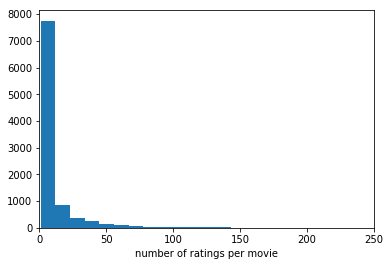

In [49]:
no_of_ratings = ratings.groupby('title').count()['rating']
plt.hist(no_of_ratings, bins = 30)
plt.xlabel('number of ratings per movie')
plt.xlim([0, 250])



We see that the majority of movies have the number of reviews between 0-50

Now, let us plot another histogram to see the distribution of the mean rating for each movie.

(array([  96.,   12.,  158.,   27.,  226.,   83.,  484.,  210.,  702.,
         259.,  497., 1343.,  778., 1430.,  873., 1401.,  361.,  437.,
          43.,  299.]),
 array([0.5  , 0.725, 0.95 , 1.175, 1.4  , 1.625, 1.85 , 2.075, 2.3  ,
        2.525, 2.75 , 2.975, 3.2  , 3.425, 3.65 , 3.875, 4.1  , 4.325,
        4.55 , 4.775, 5.   ]),
 <a list of 20 Patch objects>)

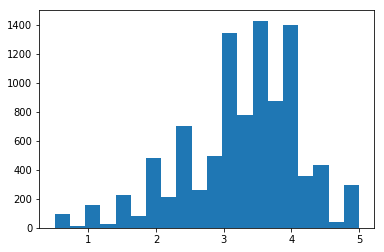

In [50]:
mean_ratings= ratings.groupby('title').mean()['rating']
plt.hist(mean_ratings, bins = 20)

#We plot a histogram to show the distribution of the mean ratings for all the movies.

We see that the most common mean rating among all the movies lies between 3-4

Let us plot a scatterplot between mean ratings and number of ratings

Text(0,0.5,'No of ratings')

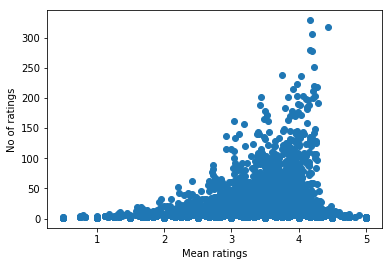

In [51]:
plt.scatter(x = mean_ratings, y = no_of_ratings)
plt.xlabel('Mean ratings')
plt.ylabel('No of ratings')

We observe that the majority of ratings are given to movies whose mean rating lies around 4

# Pivot Table

Pivot table is used to create a new dataframe out of an existing dataframe using the desired column.

In [52]:
p_table_ratings = pd.pivot_table(ratings, columns = ['title'], index = ['userId'], values = 'rating')
p_table_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We drop the columns for the movies which have less than 10 ratings. These columns will only create noise in our dataset if we keep them

In [53]:
p_table_ratings = p_table_ratings.dropna(axis=1, thresh=10)
p_table_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let us fill the remaining NaN values with 0. In this way, we completely eliminate all NaN values in our dataset.

In [54]:
p_table_ratings = p_table_ratings.fillna(0)
p_table_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Correlation Matrix

Correlation table is used to calculate pairwise correlation of columns with other columns. By default, the .corr function uses the Pearson coefficient method.

In [17]:
similarity_df = p_table_ratings.corr()

In [18]:
similarity_df.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518


The rating_similarity function calculates the score for all movies in the similarity_df based on a single movie and the user rating for that movie passed in as parameters.

In [19]:

    
def rating_similarity(movie, rating):
    rating_score = (rating-2.5)*similarity_df[movie] 
    return rating_score

The get_recommendation function uses the rating_similarity function to create a dataframe of scores of all movies based on the an array of tuples (movie, rating) which are taken as input from the user. Then, it computes the final score of all movies by adding the indivisual scores from each row and displying it in descending order.

In [20]:
def get_recommendation(m):
    disp_df = pd.DataFrame()
    similar_movies = pd.DataFrame()
    for movie, rating in m:
        similar_movies = similar_movies.append(rating_similarity(movie, rating), ignore_index = True)
        similar_movies.drop(movie, axis=1, inplace=True)
    disp_df['score'] = similar_movies.sum().sort_values(ascending=False)
    display(disp_df.rename_axis('title').reset_index().merge(movies[['title', 'genres']]).set_index('title').head(30))


The following cell contains the user_interface function which is implemented using a combination of python widgets, HTML, CSS and Javascript.

In [21]:
user_reviews = []
def user_interface():

    user_reviews.clear()
    movie_n = ''
    rating = 0
    options = ''
    for i in similarity_df.index:
        options += '<option>' + i + '</option>'
    html = '''<div>
            Movie Name:<br> <datalist id="suggestions">'''+ options  + '''</datalist><input id = 'movid' autoComplete="on" list="suggestions">        
            <br/><br>
            Your ratings: <br> <datalist id="rating"><option>1</option><option>2</option><option>3</option><option>4</option><option>5</option></datalist><input id = 'ratid' autoComplete="on" list="rating">
            <br/><br>
            
            <button style = "padding-left: 10px;
    padding-right: 10px;
    padding-top: 0px;
    padding-bottom: 0px;
    display: inline-block;
    white-space: nowrap;
    overflow: hidden;
    text-overflow: ellipsis;
    text-align: center;
    font-size: 13px;
    cursor: pointer;
    height: 28px;
    line-height: 28px;
    box-shadow: none;
    color: rgba(0, 0, 0, .8);
    background-color: #EEEEEE;
    border-color: #E0E0E0;
    border: none;
    margin-left: 50px;" onclick="set_value()">Add review</button>
            </div>'''
    javascript = '''

            <script type="text/Javascript">
        function set_value(){
            var movie_name = document.getElementById('movid').value;
            var rating = document.getElementById('ratid').value;
            var command1 = "movie_n" + " = '" + movie_name + "'";
            var command2 = "rating" + " = " + rating;
            var command3 = "user_reviews.append((movie_n, rating))"
            var kernel = IPython.notebook.kernel;
            kernel.execute(command1);
            kernel.execute(command2);
            kernel.execute(command3)
        }
    </script>
    '''
    button = widgets.Button(description = "Get Recommendations", layout = widgets.Layout(width = '20%'))
    display(HTML(html+javascript))
    display(button)
    out = widgets.Output()
    display(out)
    def recommend_button(_):
        with out:
            clear_output()
            get_recommendation(user_reviews)
    button.on_click(recommend_button)



Now, we call the user_interface function which we have createdin the previous cell so that the user can actually interact with the recommender system and enter his ratings as well as see the recommendations given by the program based on his/her submitted ratings. To reset the already submitted ratings, just rerun the following cell. The user will only interact with the following part of the program.

In [72]:
user_interface()

Button(description='Get Recommendations', layout=Layout(width='20%'), style=ButtonStyle())

Output()